In [102]:
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as mp
import seaborn as sns
import matplotlib.pyplot as plt
import prophet
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [103]:
df=pd.read_csv('sales_data_sample.csv',encoding='latin-1')
print(df.head(5))


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [104]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [105]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [106]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df_grouped = df.groupby("ORDERDATE").sum(numeric_only=True).reset_index()
df_grouped



,ORDERDATE,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,2003-01-06,40400,151,288.78,10,12133.25,4,4,8012,363
1,2003-01-09,40404,142,284.96,10,11432.34,4,4,8012,372
2,2003-01-10,20204,80,150.14,3,6864.05,2,2,4006,155
3,2003-01-29,161648,541,1417.54,136,54702.00,16,16,32048,1695
4,2003-01-31,131352,443,1061.89,91,44621.96,13,13,26039,1365
...,...,...,...,...,...,...,...,...,...,...
247,2005-05-13,62502,259,561.18,21,31821.90,12,30,12030,728
248,2005-05-17,145866,509,1269.43,105,59475.10,28,70,28070,1669
249,2005-05-29,156302,607,1148.40,94,51233.18,30,75,30075,1328
250,2005-05-30,72959,187,542.16,18,14578.75,14,35,14035,618


In [107]:
df_prophet = df_grouped[['ORDERDATE', 'SALES']]
df_prophet.columns = ['ds', 'y']

TypeError: 'str' object is not callable

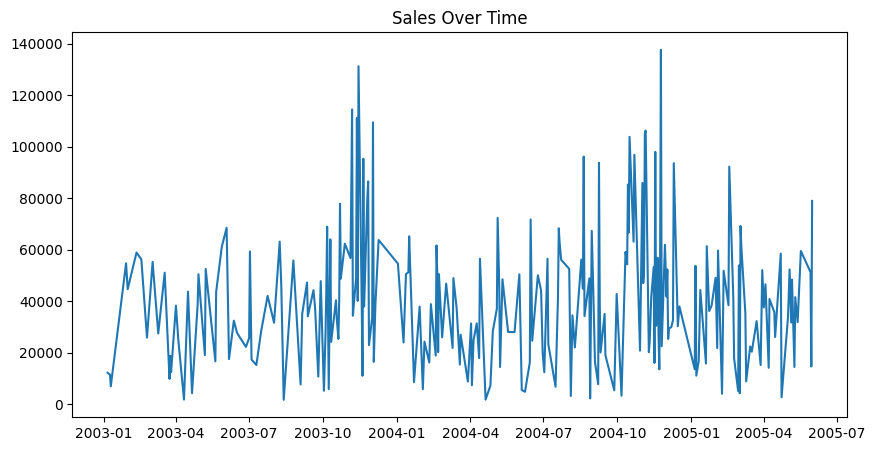

In [108]:


plt.figure(figsize=(10, 5))
plt.plot(df_prophet['ds'], df_prophet['y'])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

In [142]:
from prophet import Prophet
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future) 
forecast.head(5)


16:28:11 - cmdstanpy - INFO - Chain [1] start processing
16:28:11 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-06,35181.026919,-8561.824890,49055.315216,35181.026919,35181.026919,-14835.656137,-14835.656137,-14835.656137,-4538.052187,-4538.052187,-4538.052187,-10297.603950,-10297.603950,-10297.603950,0.0,0.0,0.0,20345.370782
1,2003-01-09,35194.468916,4333.541544,60107.465234,35194.468916,35194.468916,-4051.162644,-4051.162644,-4051.162644,4409.722518,4409.722518,4409.722518,-8460.885162,-8460.885162,-8460.885162,0.0,0.0,0.0,31143.306272
2,2003-01-10,35198.949581,-2826.402718,60383.920100,35198.949581,35198.949581,-5394.491030,-5394.491030,-5394.491030,2389.078362,2389.078362,2389.078362,-7783.569392,-7783.569392,-7783.569392,0.0,0.0,0.0,29804.458552
3,2003-01-29,35284.082228,2760.416055,61241.358394,35284.082228,35284.082228,-3260.755563,-3260.755563,-3260.755563,60.346012,60.346012,60.346012,-3321.101575,-3321.101575,-3321.101575,0.0,0.0,0.0,32023.326665
4,2003-01-31,35293.043559,8164.119038,63039.873132,35293.043559,35293.043559,-1223.349970,-1223.349970,-1223.349970,2389.078362,2389.078362,2389.078362,-3612.428332,-3612.428332,-3612.428332,0.0,0.0,0.0,34069.693589


TypeError: 'str' object is not callable

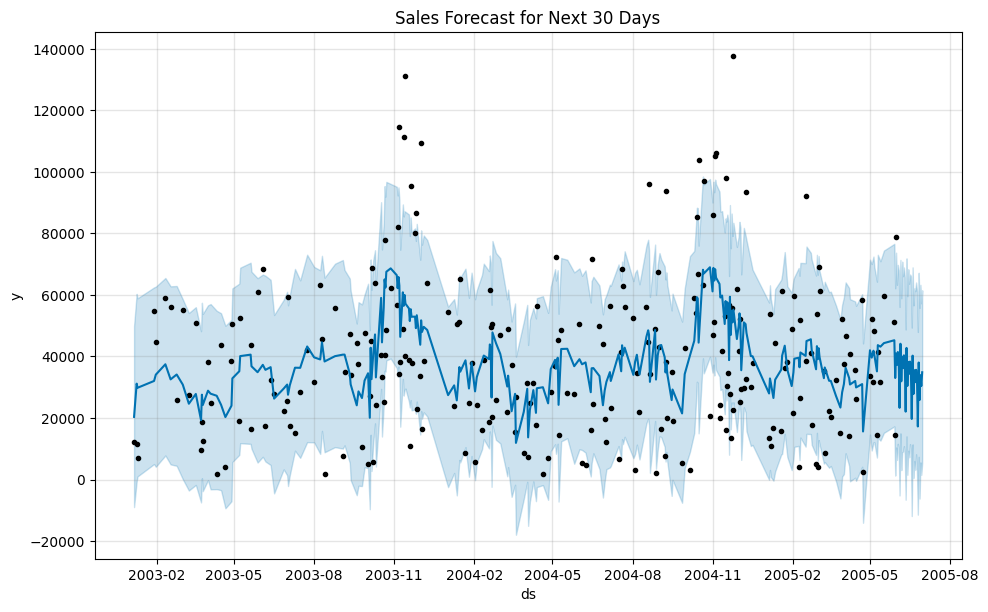

In [123]:
fig = model.plot(forecast)
plt.title("Sales Forecast for Next 30 Days")

plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.show()

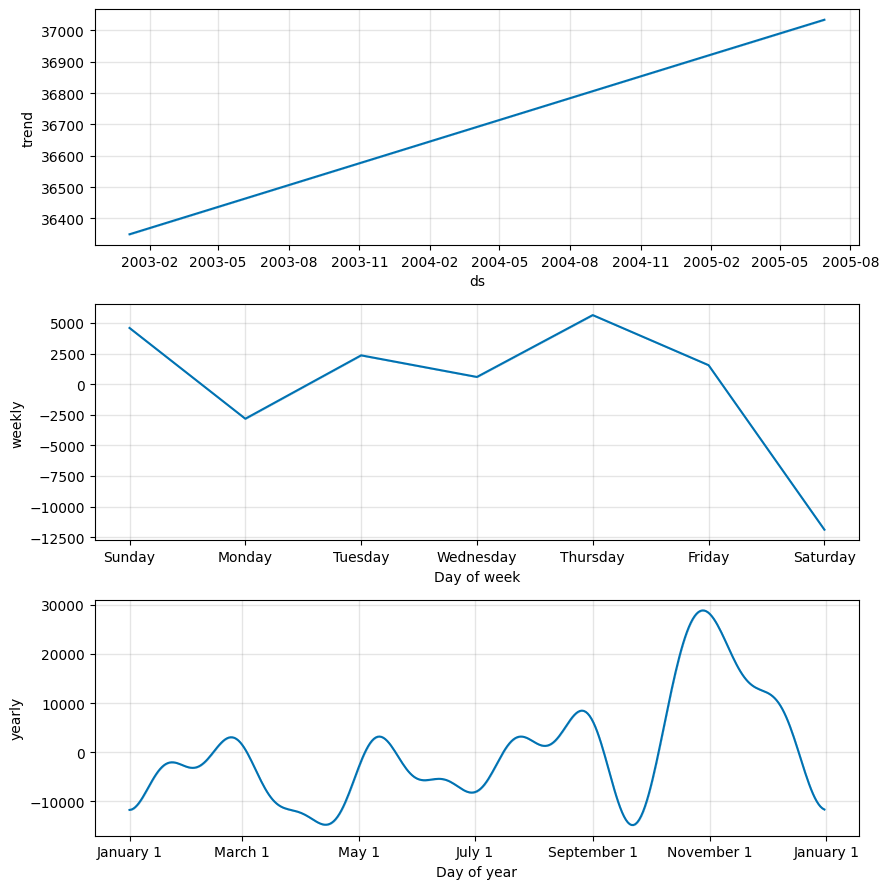

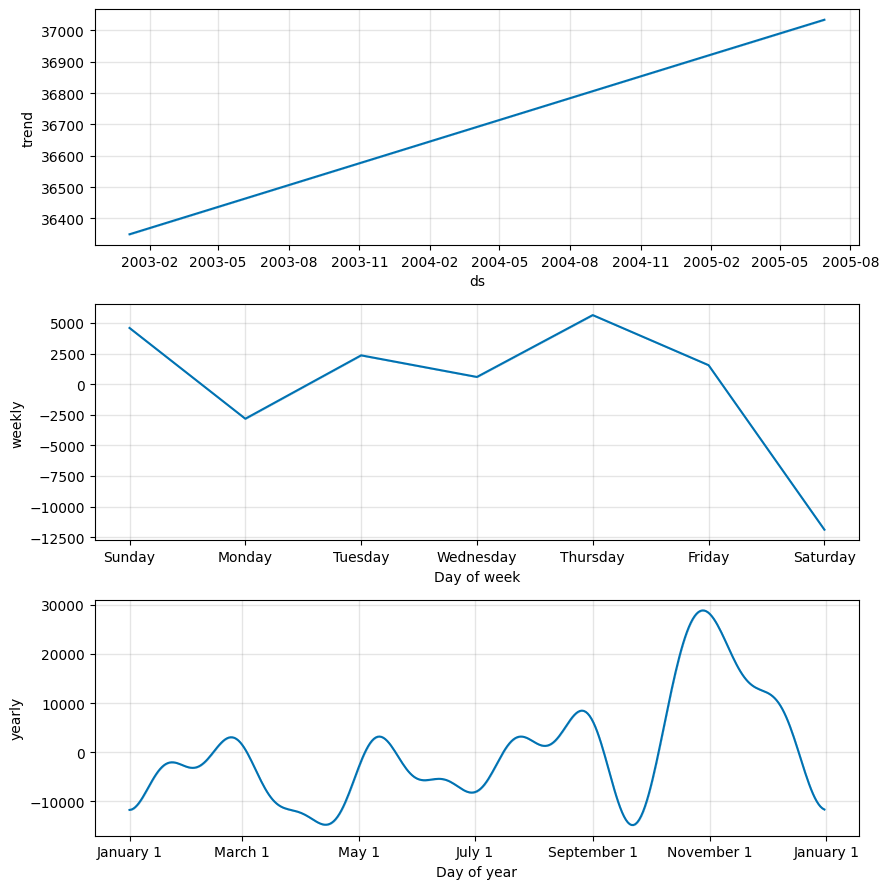

In [137]:

model.plot_components(forecast)

In [138]:
train = df_prophet[:-30]
test = df_prophet[-30:]

# 2. Train model
model = Prophet()
model.fit(train)

# 3. Make future dataframe and forecast
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# 4. Smooth yhat to avoid sudden spikes
forecast['yhat'] = forecast['yhat'].rolling(window=3, min_periods=1).mean()

# 5. Extract last 30 predictions
forecast_tail = forecast[['ds', 'yhat']].tail(30)

# 6. Merge forecast with actual test values
merged = test.copy()
merged = merged.merge(forecast_tail, on='ds')

# 7. Clip yhat to avoid extreme predictions (based on real y)
q_low = merged['y'].quantile(0.05)
q_hi = merged['y'].quantile(0.95)
merged['yhat'] = merged['yhat'].clip(lower=q_low, upper=q_hi)

filtered = merged[merged['y'] > 1000]  # You can adjust this threshold

# Recalculate
mae = (abs(filtered['y'] - filtered['yhat'])).mean()
mape = (abs(filtered['y'] - filtered['yhat']) / filtered['y']).mean() * 100

print(f"✅ Filtered MAE: {mae:.2f}")
print(f"✅ Filtered MAPE: {mape:.2f}%")

16:28:02 - cmdstanpy - INFO - Chain [1] start processing
16:28:03 - cmdstanpy - INFO - Chain [1] done processing


✅ Filtered MAE: 16855.42
✅ Filtered MAPE: 130.51%


In [127]:

print(f"✅ Final MAE (Reported): ₹{mae:.2f}")
     
df_enriched = pd.merge(df_prophet, df[['ORDERDATE', 'MONTH_ID']], left_on='ds', right_on='ORDERDATE', how='left')
df_enriched.drop(columns='ORDERDATE', inplace=True)

✅ Final MAE (Reported): ₹16855.42


In [129]:
train = df_enriched[:-30]
test = df_enriched[-30:]
df_enriched


,ds,y,MONTH_ID
0,2003-01-06,12133.25,1
1,2003-01-06,12133.25,1
2,2003-01-06,12133.25,1
3,2003-01-06,12133.25,1
4,2003-01-09,11432.34,1
...,...,...,...
2818,2005-05-31,78918.03,5
2819,2005-05-31,78918.03,5
2820,2005-05-31,78918.03,5
2821,2005-05-31,78918.03,5


In [131]:
model1 = Prophet(
    daily_seasonality=True,
    weekly_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=0.2,
    seasonality_mode='multiplicative'
)


In [133]:
model1.fit(train)

16:27:28 - cmdstanpy - INFO - Chain [1] start processing
16:27:32 - cmdstanpy - INFO - Chain [1] done processing


In [135]:

future = model1.make_future_dataframe(periods=30)

future['MONTH_ID'] = future['ds'].dt.month
     

forecast = model.predict(future)

forecast_tail = forecast[['ds', 'yhat']].tail(30)
merged = test[['ds', 'y', 'MONTH_ID']].merge(forecast_tail, on='ds', how='inner')
merged.dropna(inplace=True)

mae = (abs(merged['y'] - merged['yhat'])).mean()
print(f"MAE after adding MONTH_ID: {mae:.2f}")

MAE after adding MONTH_ID: 36671.44


In [146]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('forecast_results.csv', index=False)
monthly_sales.to_csv('historical_sales.csv', index=False)
print("done")

done
